In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.colors import rgb2hex
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import matplotlib.colors as colors


In [2]:
trees = pd.read_csv('TreePop.csv',index_col = 0)#load data
trees.set_index('State', inplace=True) #drop state id, won't use here (probably could combine with above line)

In [3]:
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='50m',category='cultural', name=shapename)

/Users/neutrino/opt/anaconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


/Users/neutrino/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt


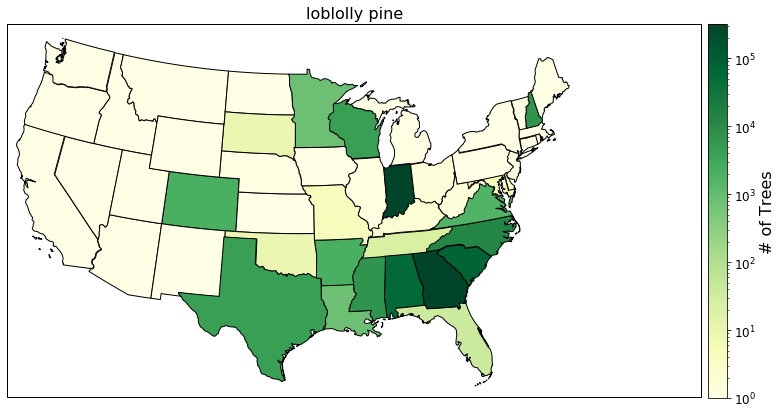

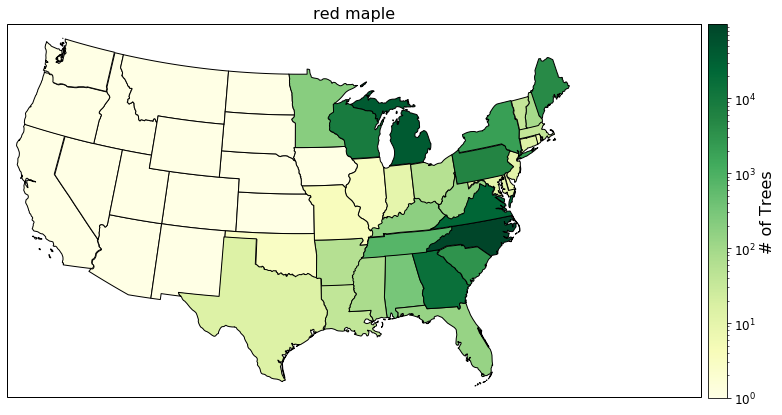

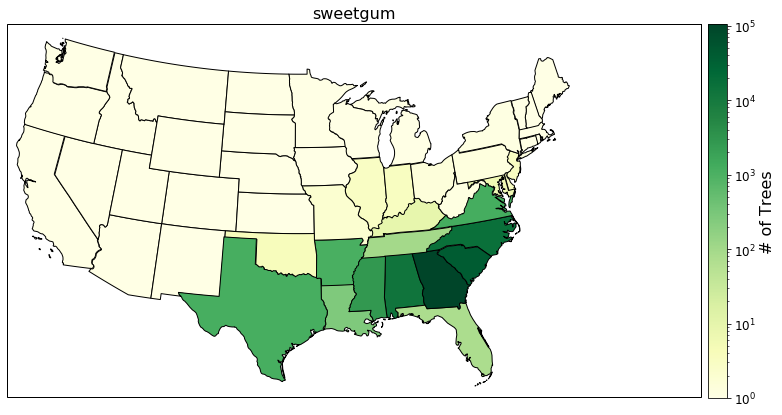

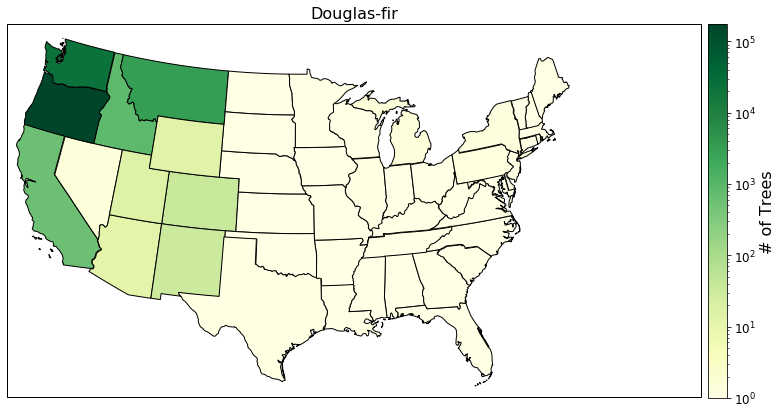

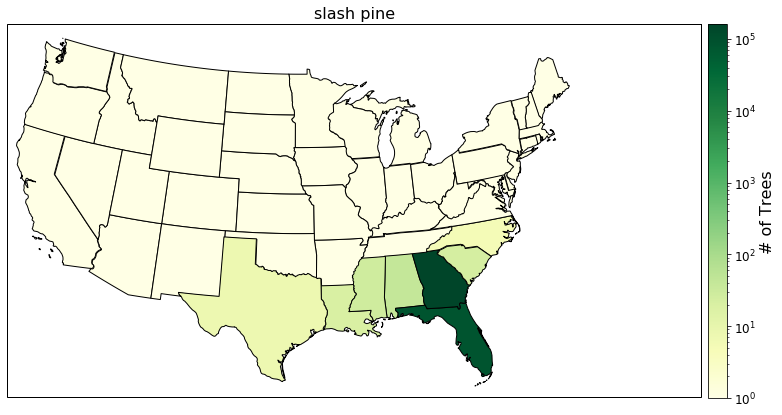

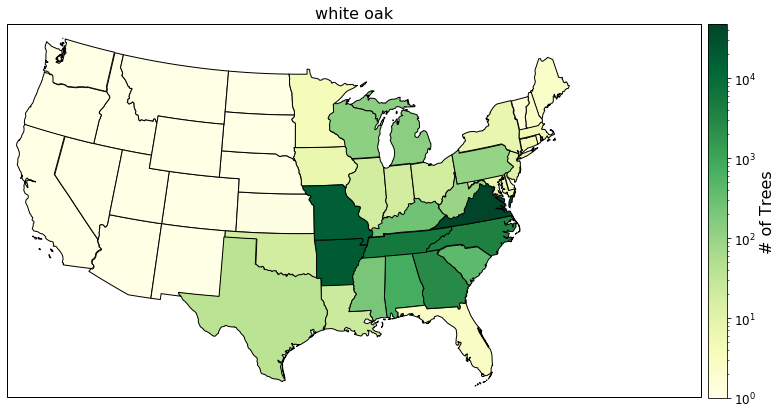

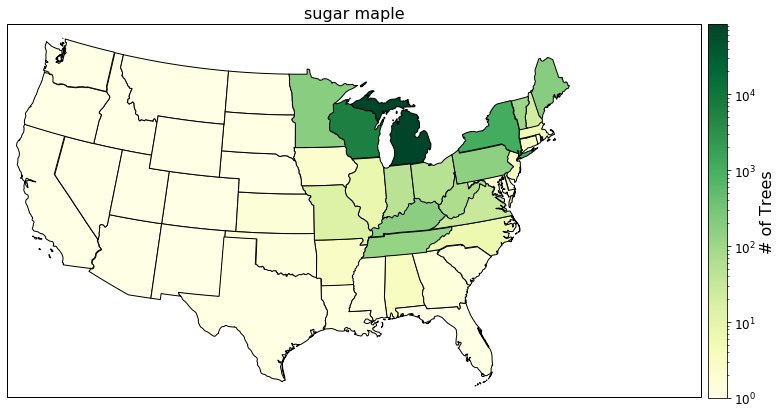

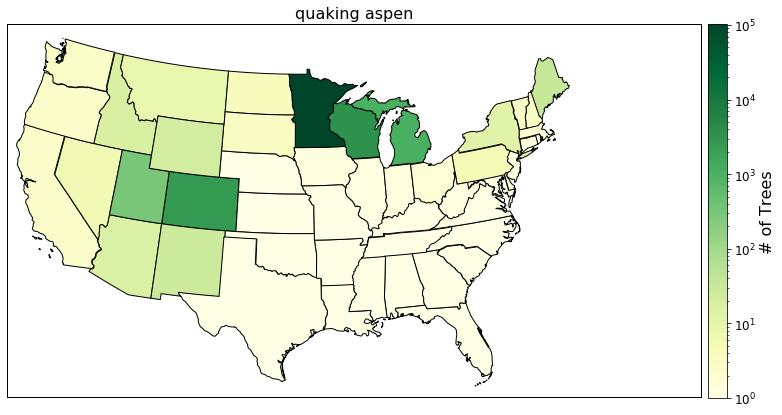

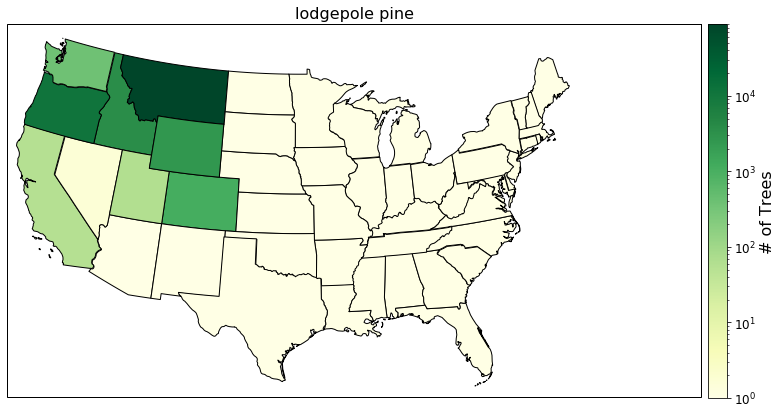

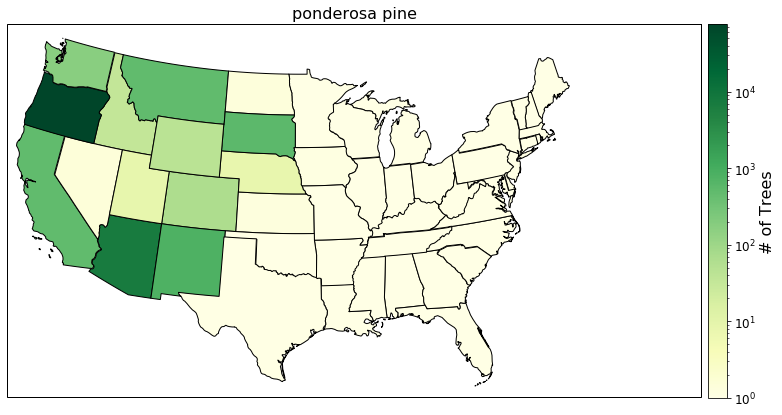

In [10]:
cmap = plt.cm.YlGn # use 'YlGn' colormap
for species in trees.columns: #make a plot for each tree type (I guess I could use subplots...)
    
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
    ax.set_extent([-119, -64, 22, 49], ccrs.Geodetic()) #only plot US map

    #ax.outline_patch.set_visible(False) #need to find solution to this, depreciated

    ax.set_title(species, fontsize = 16)
    vmin = 1; vmax = trees[species].max() # set range. Added vmmin=1 so LogNorm doesn't complain.

    for astate in shpreader.Reader(states_shp).records():
        try:
            # use the name of this state to get pop_density
            state_dens = trees.loc[astate.attributes['name']][species]
        except:
            continue
        color = rgb2hex(cmap(np.sqrt((state_dens-vmin)/(vmax-vmin)))[:3])

        #`astate.geometry` is the polygon to plot
        ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                          facecolor=color, edgecolor='black')
    cbar = fig.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap=cmap),
                        ax=ax,fraction=0.026,pad = 0.01) # LogNorm converts the colobar to Log scale.
    cbar.set_label('# of Trees',fontsize = 16)
#     cbar.formatter.set_powerlimits((0, 0))
    cbar.update_ticks()
    cbar.ax.tick_params(labelsize=12) 

plt.show()